In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

c:\users\hjl161\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
datafile_AMT = '../data/MTurk_anonymous.xlsx'
datafile_DTU1 = '../data/DTU1_anonymous.xlsx'
datafile_DTU2 = '../data/DTU2_anonymous.xlsx'

dfm = pd.DataFrame(pd.read_excel(datafile_AMT))
dfd1 = pd.DataFrame(pd.read_excel(datafile_DTU1))
dfd2 = pd.DataFrame(pd.read_excel(datafile_DTU2))

df_concat = pd.concat([dfm.join(pd.Series(['dfm']*len(dfm), name='experiment')), 
                dfd1.join(pd.Series(['dfd']*len(dfd1), name='experiment')),
                dfd2.join(pd.Series(['dfd']*len(dfd2), name='experiment'))],
                ignore_index=True)

df = df_concat[['arrival', 'choice', 'certainty', 'experiment']]
df.head()

,arrival,choice,certainty,experiment
0,8.2,1,0.875,dfm
1,8.3,1,0.875,dfm
2,8.2,0,0.500,dfm
3,8.1,1,0.875,dfm
4,8.2,1,0.990,dfm


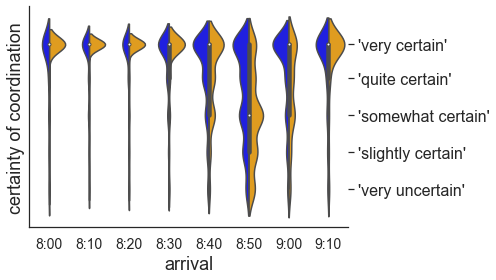

In [3]:
fig, ax = plt.subplots(figsize=(7,4))
ax = sns.violinplot(x='arrival', y='certainty', hue="experiment", palette=['blue', 'orange'], split=True, data=df)
ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
plt.ylabel('certainty of coordination', fontsize=18)
plt.xlabel('arrival', fontsize=18)
ax.set_xticklabels(["8:00", "8:10", "8:20", "8:30", "8:40", "8:50", "9:00", "9:10"], fontsize=14)
plt.yticks([.5, .625, .75, .875, .99], ['\'very uncertain\'', '\'slightly certain\'', '\'somewhat certain\'', '\'quite certain\'', '\'very certain\''], fontsize=16)
ax.legend_.remove()
plt.tight_layout()

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig2_certainties.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'fig2_certainties.pdf'), transparent=True, dpi=300)
sns.despine()